# Linear regression -Multiple variable

In [65]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
#do plotting inline instead of in a seperate window.
%matplotlib inline


In [66]:
df = pd.read_csv("C:\\Users\\dhala\\Desktop\\Coursera\\ML-1\\ex1\\ex1data2.txt",header=None,names=['Size','Bedrooms','Price'])
df.shape
df.head(2)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900


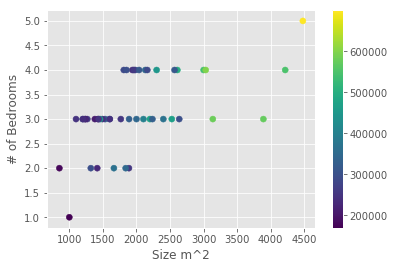

In [83]:
#Pass data to a matrix
x = df.as_matrix(columns = ['Size','Bedrooms'])
y = df.as_matrix(columns = ['Price'])
#plt.tricontour(x[:,0],x[:,1],y[:,0],colors='k')
plt.scatter(df['Size'],df['Bedrooms'],c=y)
plt.xlabel('Size m^2')
plt.ylabel('# of Bedrooms')
plt.colorbar()
plt.show()

In [8]:
datafile = 'C:\\Users\\dhala\\Desktop\\Coursera\\ML-1\\ex1\\ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

print(X.shape)


NameError: name 'np' is not defined

In [9]:
#Quick visualize data
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

NameError: name 'plt' is not defined